# Wells Fargo Job Simulation

### Search Engine Relevance Optimization

***Frank Xu***

***(919)308-3187***

***Duke University***

In [1]:
# Improve HD display for MacBook
%config InlineBackend.figure_format = 'retina'

# Import essential packages
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### EDA & Preprocessing

In [2]:
# Read data and check dimensions
data = pd.read_csv('Dataset.csv')
data.shape

(80046, 13)

In [3]:
# Check if any column contains Null values
data.isna().any()

query_id        False
url_id          False
query_length    False
is_homepage     False
sig1            False
sig2            False
sig3            False
sig4            False
sig5            False
sig6            False
sig7            False
sig8            False
relevance       False
dtype: bool

In [4]:
# Check on data summary
data.describe()

,query_id,url_id,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
count,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000
mean,10862.069672,64219.328074,2.585826,0.268945,0.183240,0.346947,4857.078555,742.316256,550.527597,14.099155,0.319464,0.471846,0.437086
std,3586.767728,22522.930075,1.522094,0.443414,0.147354,0.172545,23531.973200,4818.359126,1887.933968,90.068426,0.138651,0.231306,0.496029
min,4631.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7756.000000,45386.250000,2.000000,0.000000,0.080000,0.210000,78.000000,24.000000,10.000000,0.000000,0.220000,0.290000,0.000000
50%,10876.000000,64325.500000,2.000000,0.000000,0.150000,0.340000,417.000000,220.000000,64.000000,0.000000,0.310000,0.460000,0.000000
75%,13950.000000,83446.000000,3.000000,1.000000,0.240000,0.480000,2537.750000,591.000000,336.000000,2.000000,0.420000,0.640000,1.000000
max,17038.000000,102816.000000,18.000000,1.000000,1.000000,0.860000,673637.000000,660939.000000,46994.000000,3645.000000,0.880000,0.940000,1.000000


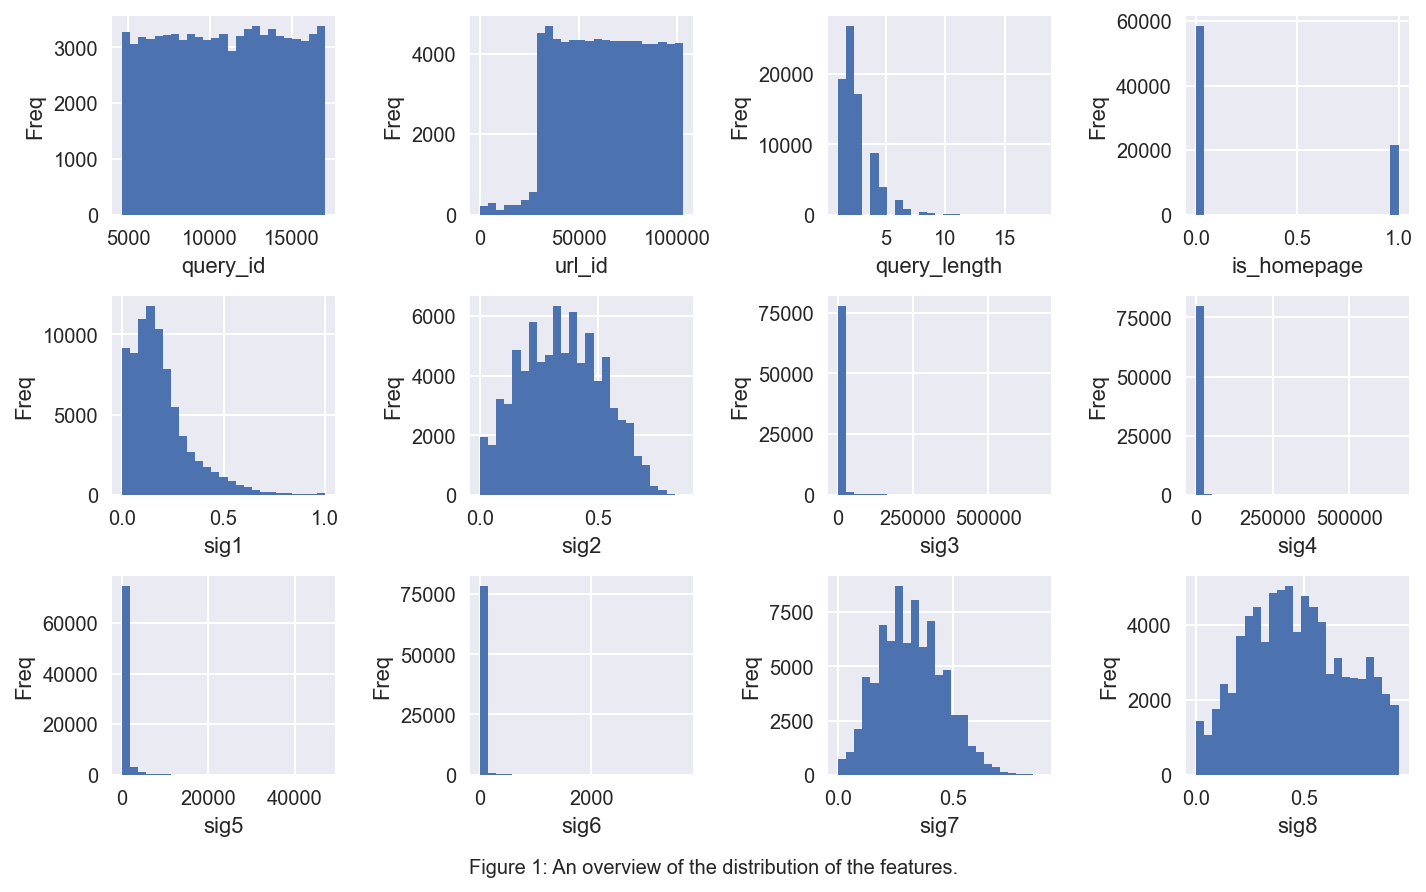

In [5]:
# Plotting feature distributions
feature = data.columns[:-1]
fig = plt.figure(figsize=(10, 6))
for idx, col in enumerate(feature):
    plt.subplot(3, 4, idx+1)
    plt.hist(data[col], bins = 25)
    plt.ylabel('Freq');plt.xlabel(feature[idx])
fig.text(.5, -.02, 'Figure 1: An overview of the distribution of the features.', ha='center')
plt.tight_layout()
plt.show()

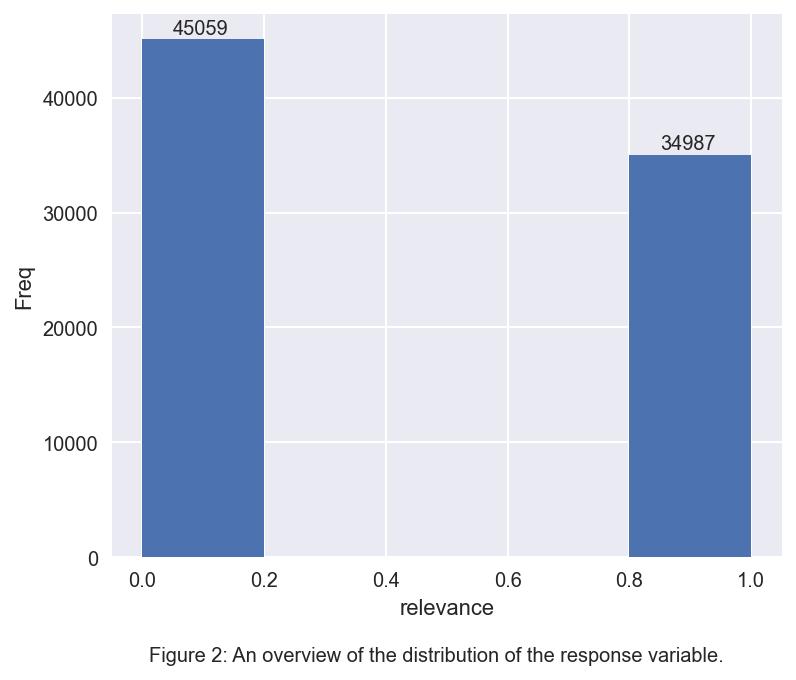

In [6]:
# Plotting response distribution
fig = plt.figure(figsize=(6, 5))
plt.hist(data.relevance, bins = 5)
plt.ylabel('Freq');plt.xlabel('relevance')
fig.text(.5, -.02, 'Figure 2: An overview of the distribution of the response variable.', ha='center')
label_1 = data.relevance.sum()
label_0 = data.shape[0] - label_1
plt.text(0.85 ,label_1 + 500, label_1)
plt.text(0.05 ,label_0 + 500, label_0)
plt.show()

Text(0.5, 0.1, 'Figure 3: Correlation Matrix of all variables.')

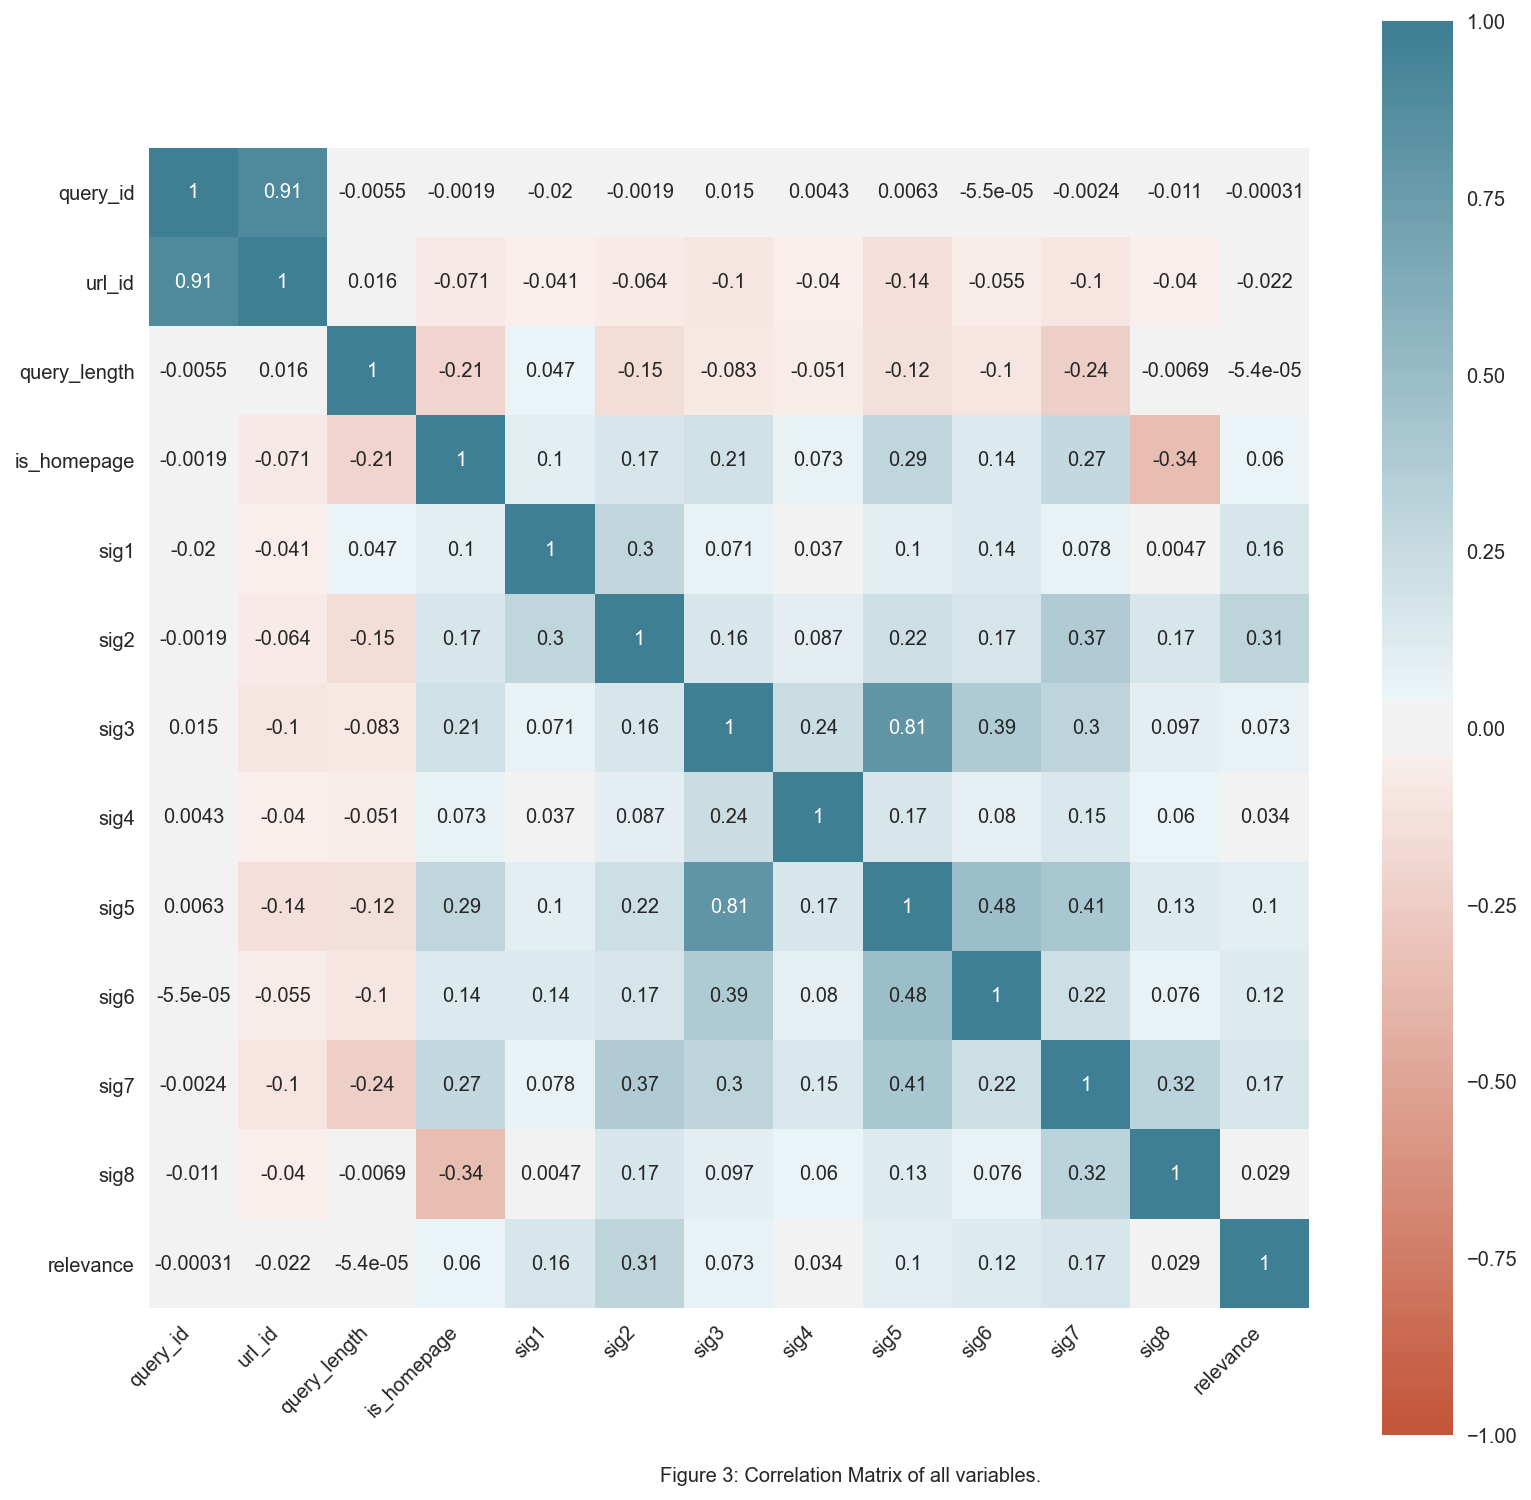

In [7]:
# Plotting correlation matrix
corr = data.corr()
fig = plt.figure(figsize=(13, 13))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), 
                 square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.text(.5, .1, 'Figure 3: Correlation Matrix of all variables.', ha='center')

In [8]:
# import essential packages
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler

# Removing ID-related features and creating X, y
X = data.iloc[:,2:-1]
y = data.relevance
# Creating X2 to include some log-transformed features
X2 = X.copy()
X2['log_ql'] = np.log(X.query_length + .0001)
X2['log_sig1'] = np.log(X.sig1 + .0001)
X2['log_sig3'] = np.log(X.sig3 + .0001)
X2['log_sig4'] = np.log(X.sig4 + .0001)
X2['log_sig5'] = np.log(X.sig5 + .0001)
X2['log_sig6'] = np.log(X.sig6 + .0001)

# Splitting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=24)

# Normalizing training data
SS = StandardScaler()
X_train_Normalized = pd.DataFrame(data = SS.fit_transform(X_train), columns = X.columns)
X_test_Normalized = pd.DataFrame(data = SS.transform(X_test), columns = X.columns)
SS2 = StandardScaler()
X2_train_Normalized = pd.DataFrame(data = SS2.fit_transform(X2_train), columns = X2.columns)
X2_test_Normalized = pd.DataFrame(data = SS2.transform(X2_test), columns = X2.columns)

### Utility functions

In [9]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
# A utility function for plotting ROC curves
def plot_curves(label, preds, C = True, lab = ''):
    fpr, tpr, _ = roc_curve(label, preds)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(label, preds)
    f1 = f1_score(label, preds>0.5)
    plt.subplot(1,2,1)
    if C == True:
        plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = lab + 
                 'ROC curve (area = {0:0.3f})'.format(roc_auc))
    else:
        plt.plot(fpr, tpr, lw = 2, label = lab + 'ROC curve (area = {0:0.3f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle='--')
    plt.xlim([-0.01, 1.0]);plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.subplot(1,2,2)
    if C == True:
        plt.step(recall, precision, color='b', alpha=0.2, where='post', label = lab + 
                 'Precision-Recall curve: F1={0:0.3f}'.format(f1))
        plt.fill_between(recall, precision, alpha=0.2, color='b', step = 'post')
    else:
        plt.step(recall, precision, where='post', label = lab + 'Precision-Recall curve: F1={0:0.3f}'.format(f1))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.01])
    plt.xlim([0.0, 1.0])
    plt.legend()

# A utility function for plotting validation curves
def plot_validation(model, param, param_range):
    l = len(X_train_Normalized)
    idx = np.random.choice(np.arange(l), l//4, replace=False)
    train_scores, test_scores = validation_curve(model, X_train_Normalized.iloc[idx], y_train.iloc[idx], 
                                                 param_name=param, param_range=param_range,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fig = plt.figure(figsize=(6, 2))
    plt.title("Validation Curve with {}".format(param))
    plt.xlabel(param); plt.ylabel("Score"); plt.ylim(0.45, 1.1)
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=2)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=2)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc="best")
    plt.show()

### Logistic (Ridge) Regression

##### 1. Model with original data

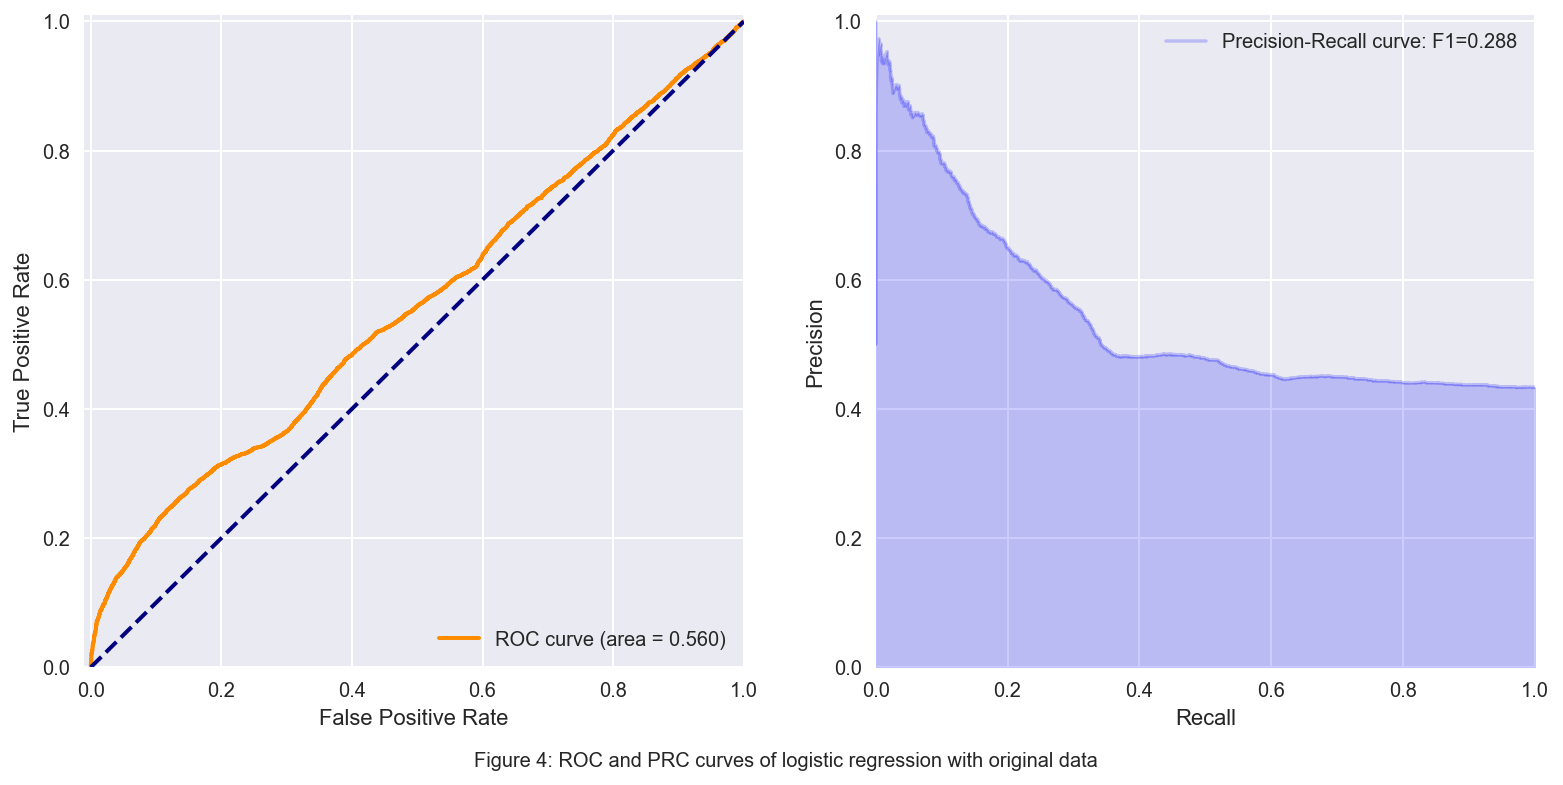

In [10]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 24)
# The model is using original data
pred_LR1 = LR.fit(X_train, y_train).predict_proba(X_test).T[1]
fig = plt.figure(figsize=(13, 6))
plot_curves(y_test, pred_LR1)
fig.text(.5, .01, 'Figure 4: ROC and PRC curves of logistic regression with original data', ha='center')
plt.show()

##### 2. Model with normalized data

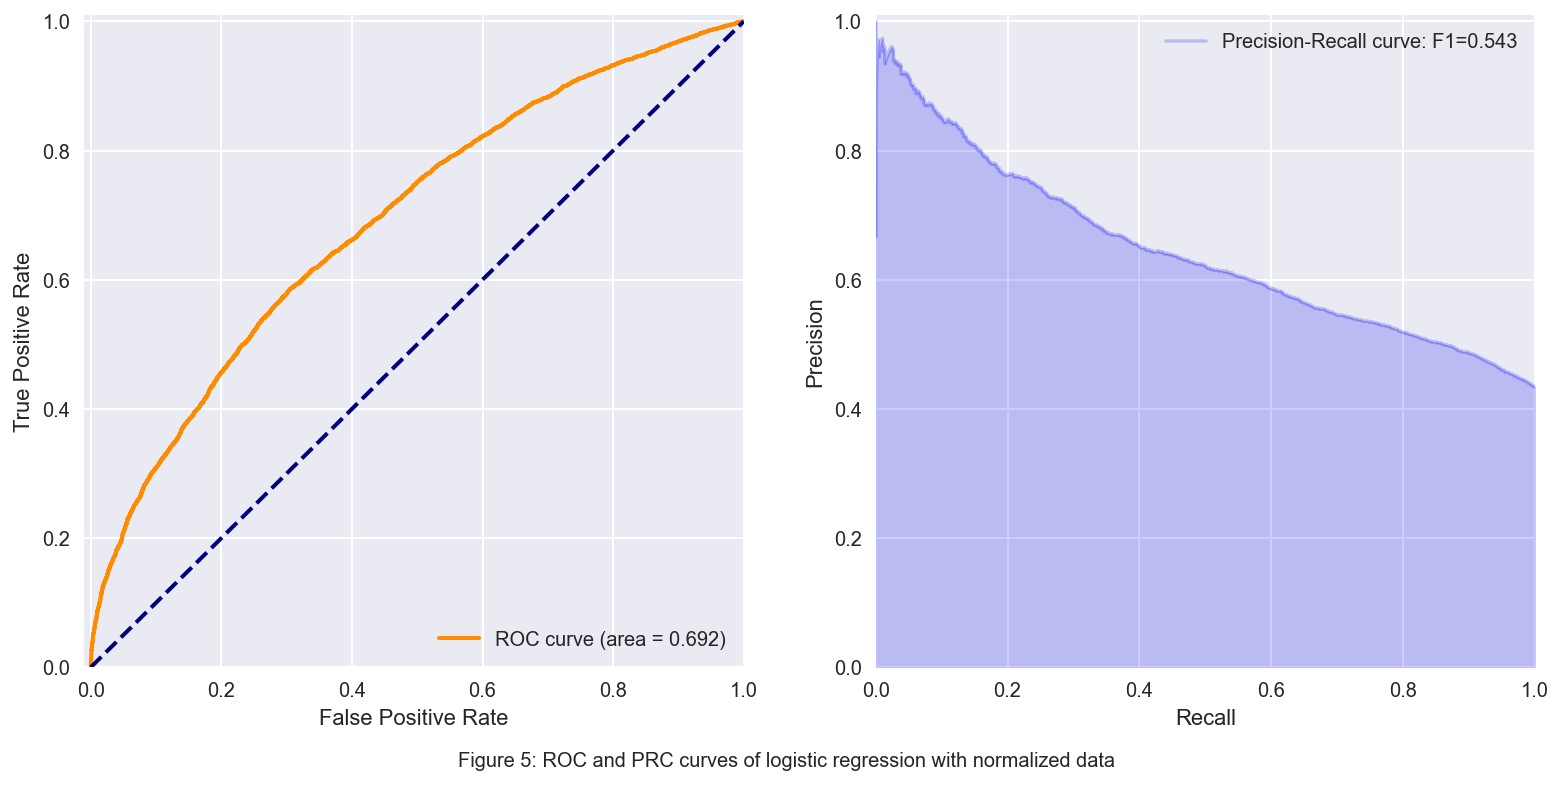

In [11]:
LR = LogisticRegression(random_state = 24)
# The model is using Normalized data
pred_LR2 = LR.fit(X_train_Normalized, y_train).predict_proba(X_test_Normalized).T[1]
fig = plt.figure(figsize=(13, 6))
plot_curves(y_test, pred_LR2)
fig.text(.5, .01, 'Figure 5: ROC and PRC curves of logistic regression with normalized data', ha='center')
plt.show()

##### 3. Model with normalized and Log-transformed data

used time: 0.18905305862426758


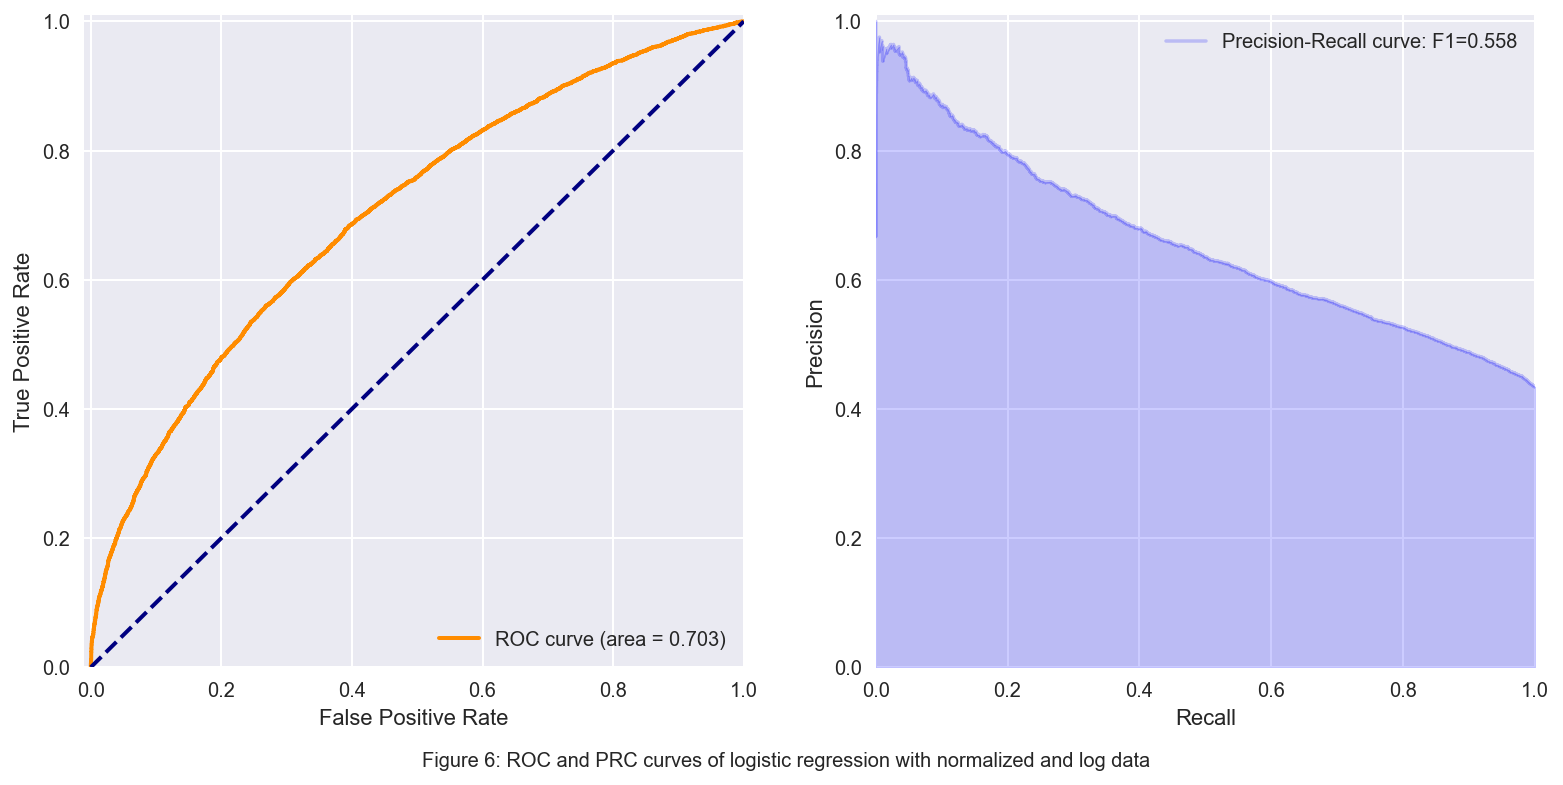

In [12]:
t = time.time()
LR = LogisticRegression(random_state = 24)
# The model is using Normalized and Log-transformed data
pred_LR3 = LR.fit(X2_train_Normalized, y_train).predict_proba(X2_test_Normalized).T[1]
print('used time:', time.time()-t)
fig = plt.figure(figsize=(13, 6))
plot_curves(y_test, pred_LR3)
fig.text(.5, .01, 'Figure 6: ROC and PRC curves of logistic regression with normalized and log data', ha='center')
plt.show()

### Random Forest

##### 1. Validation curves

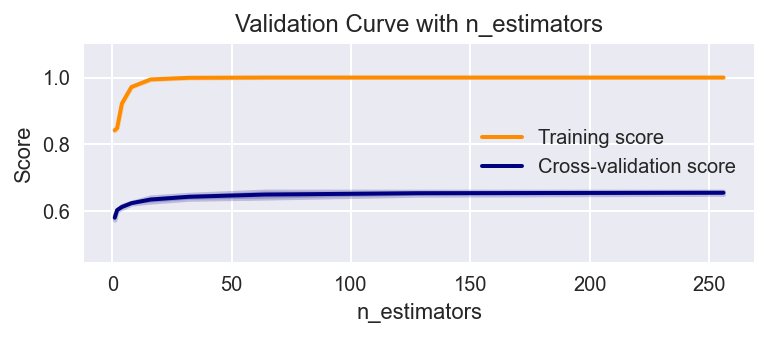

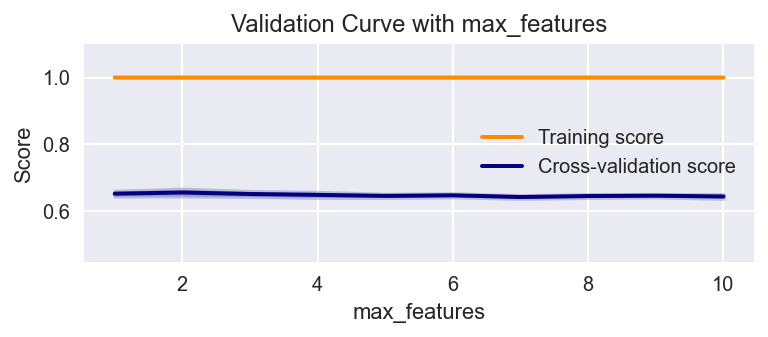

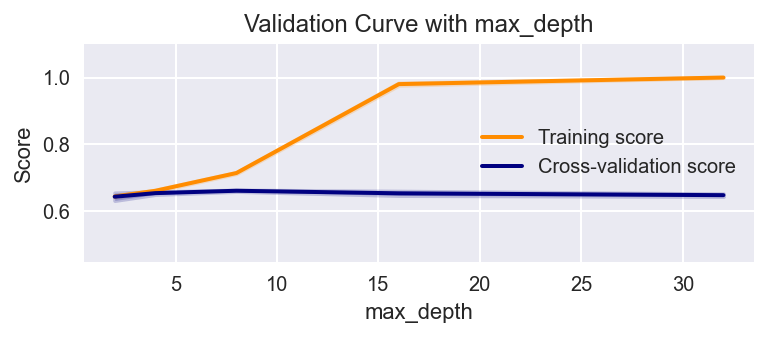

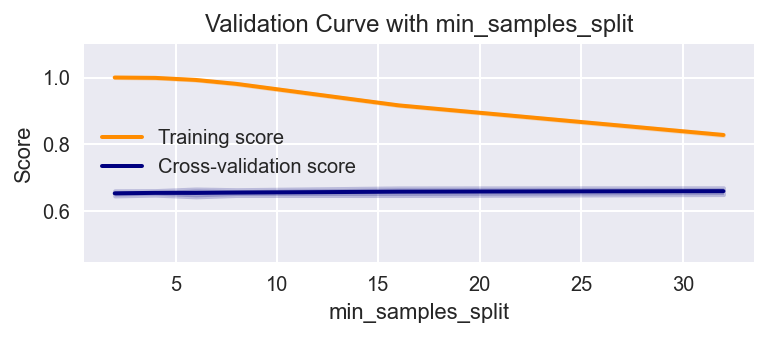

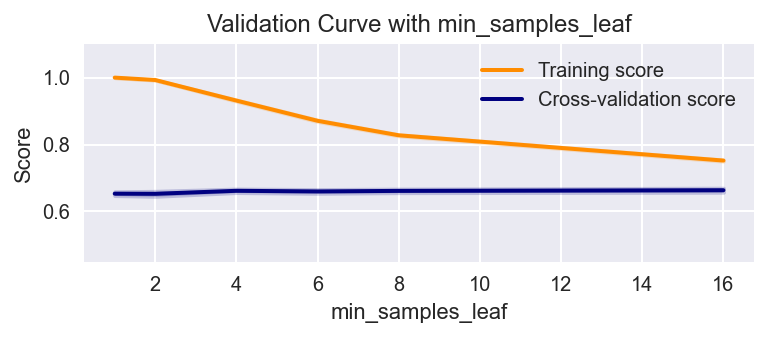

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create a parameter grid and plot validation curves
param_grid = {# Number of trees in random forest
              'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256],
              # Number of features to consider at every split
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              # Maximum number of levels in tree
              'max_depth': [2, 4, 8, 16, 32],
              # Minimum number of samples required to split a node
              'min_samples_split': [2, 4, 6, 8, 16, 32],
              # Minimum number of samples required at each leaf node
              'min_samples_leaf': [1, 2, 4, 6, 8, 16]}
# The actual plotting process takes a long time
for param in param_grid:
    plot_validation(RandomForestClassifier(), param, param_grid[param])

##### 2. Grid Search CV parameter tuning

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid
param_grid = {# Number of trees in random forest
              'n_estimators': [50, 100, 150, 200],
              # Number of features to consider at every split
              'max_features': [2, 3, 4, 5],
              # Maximum number of levels in tree
              'max_depth': [4, 8, 16, 32],
              # Minimum number of samples required to split a node
              'min_samples_split': [2, 4, 6, 8],
              # Minimum number of samples required at each leaf node
              'min_samples_leaf': [4, 6, 8, 16]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 1)

#grid_search.fit(X_train_Normalized, y_train)
#grid_search.best_params_

##### 3. Fit and evaluate model

used time: 2.030135154724121


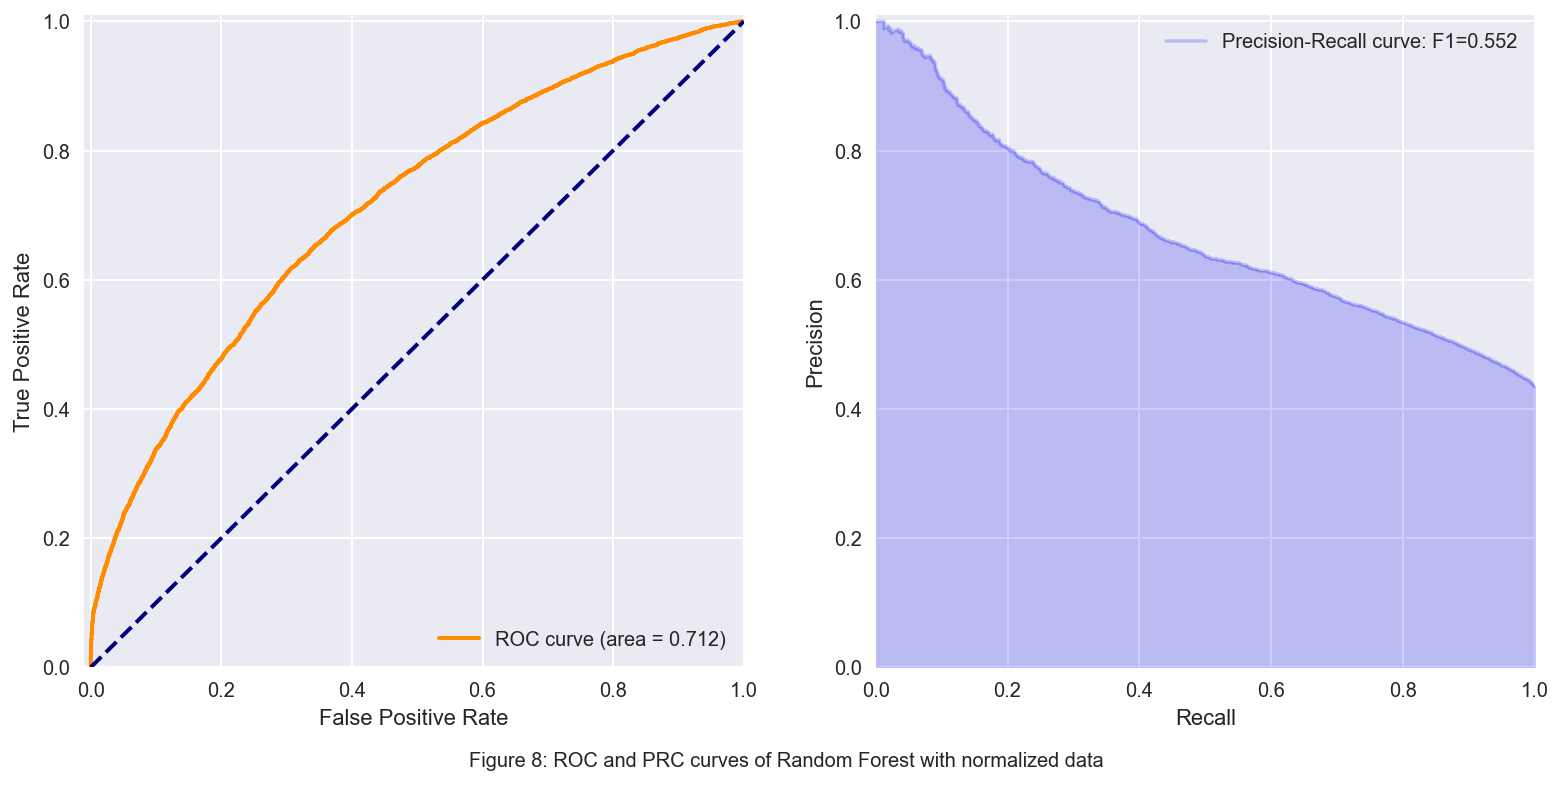

In [15]:
# best parameter from the trained data
RF_params = {'max_depth': 16,
             'max_features': 2,
             'min_samples_leaf': 8,
             'min_samples_split': 6,
             'n_estimators': 200}

t = time.time()
RF = RandomForestClassifier(**RF_params, random_state = 24, n_jobs = -1)
# Model is using Normalized data
pred_RF = RF.fit(X_train_Normalized, y_train).predict_proba(X_test_Normalized).T[1]
print('used time:', time.time()-t) 
fig = plt.figure(figsize=(13, 6))
plot_curves(y_test, pred_RF)
fig.text(.5, .01, 'Figure 8: ROC and PRC curves of Random Forest with normalized data', ha='center')
plt.show()

### Light Gradient Boosting Machine

##### 1. Validation curves

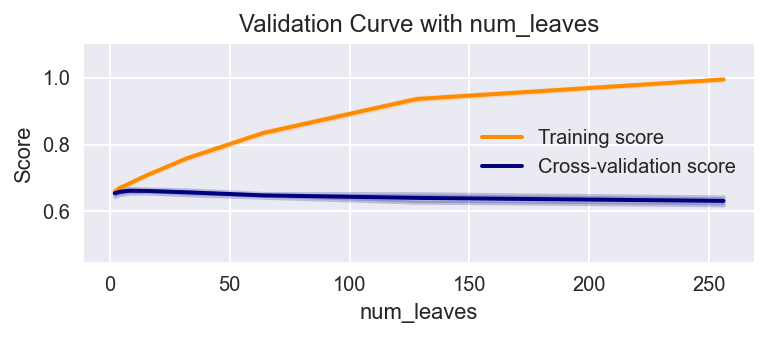

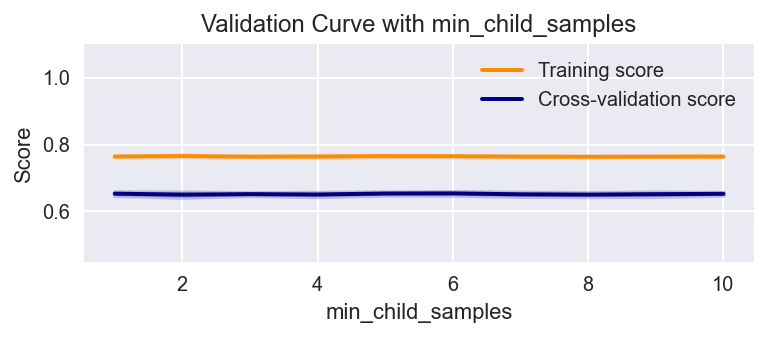

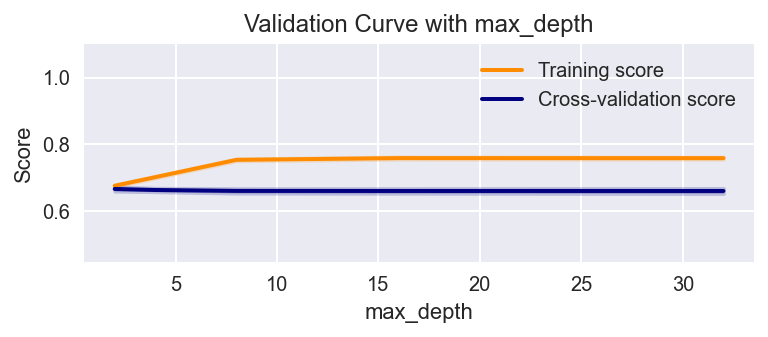

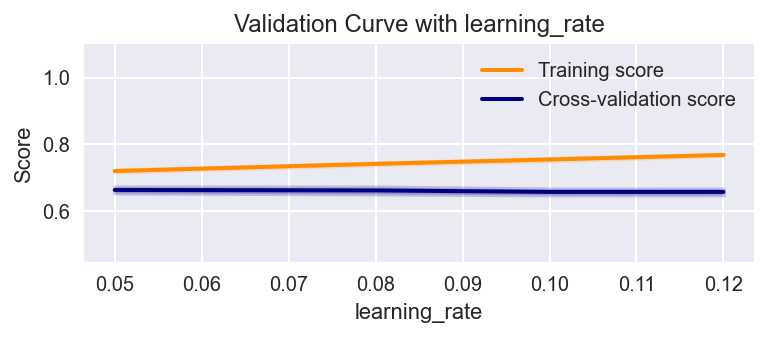

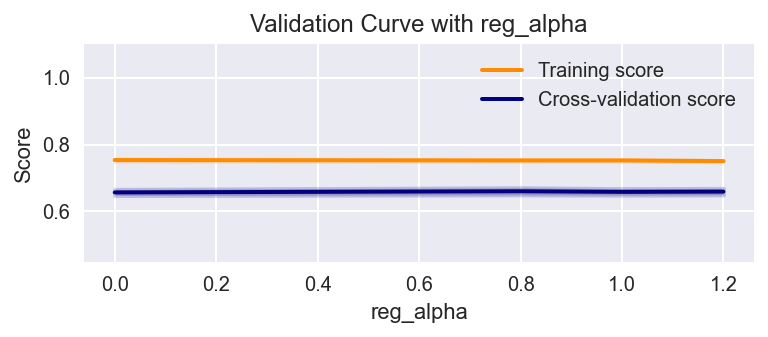

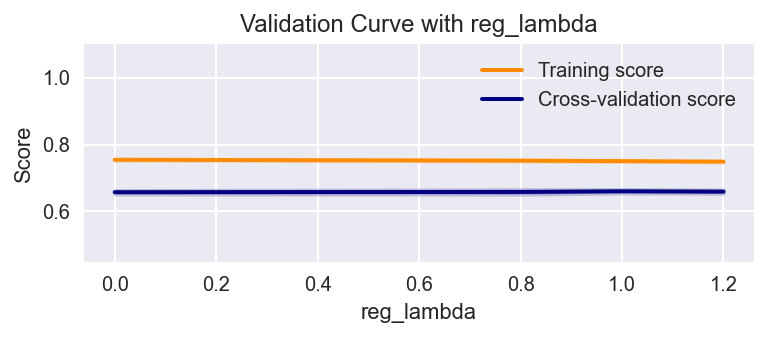

In [16]:
from lightgbm import LGBMClassifier

# Creating parameter grid to plot validation curves
param_grid = {# Maximum tree leaves for base learners.
              'num_leaves': [1, 2, 4, 8, 16, 32, 64, 128, 256],
              # Minimum number of data needed in a child (leaf).
              'min_child_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              # Maximum tree depth for base learners.
              'max_depth': [2, 4, 8, 16, 32],
              # Learning Rate
              'learning_rate': [0.05, 0.08, 0.1, 0.12],
              # L1 Regularization
              'reg_alpha': [0, 0.8, 1, 1.2],
              # L2 Regularization
              'reg_lambda': [0, 0.8, 1, 1.2]}
# The actual plotting process takes a long time
for param in param_grid:
    plot_validation(LGBMClassifier(), param, param_grid[param])

##### 2. Grid Search CV parameter tuning

In [17]:
from lightgbm import LGBMClassifier
# Create the random grid
param_grid = {# Maximum tree leaves for base learners.
              'num_leaves': [4, 8, 16, 32, 64],
              # Minimum number of data needed in a child (leaf).
              'min_child_samples': [1, 2, 4, 8, 16, 32],
              # Maximum tree depth for base learners.
              'max_depth': [3, 4, 5, 6, 7, 8],
              # Learning Rate
              'learning_rate': [0.05, 0.08, 0.1, 0.12],
              # L1 Regularization
              'reg_alpha': [0, 0.8, 1, 1.2],
              # L2 Regularization
              'reg_lambda': [0, 0.8, 1, 1.2],}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = LGBMClassifier(), 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 1)

#grid_search.fit(X_train_Normalized, y_train)
#grid_search.best_params_

##### 3. Fit and evaluate model

used time: 0.1988370418548584


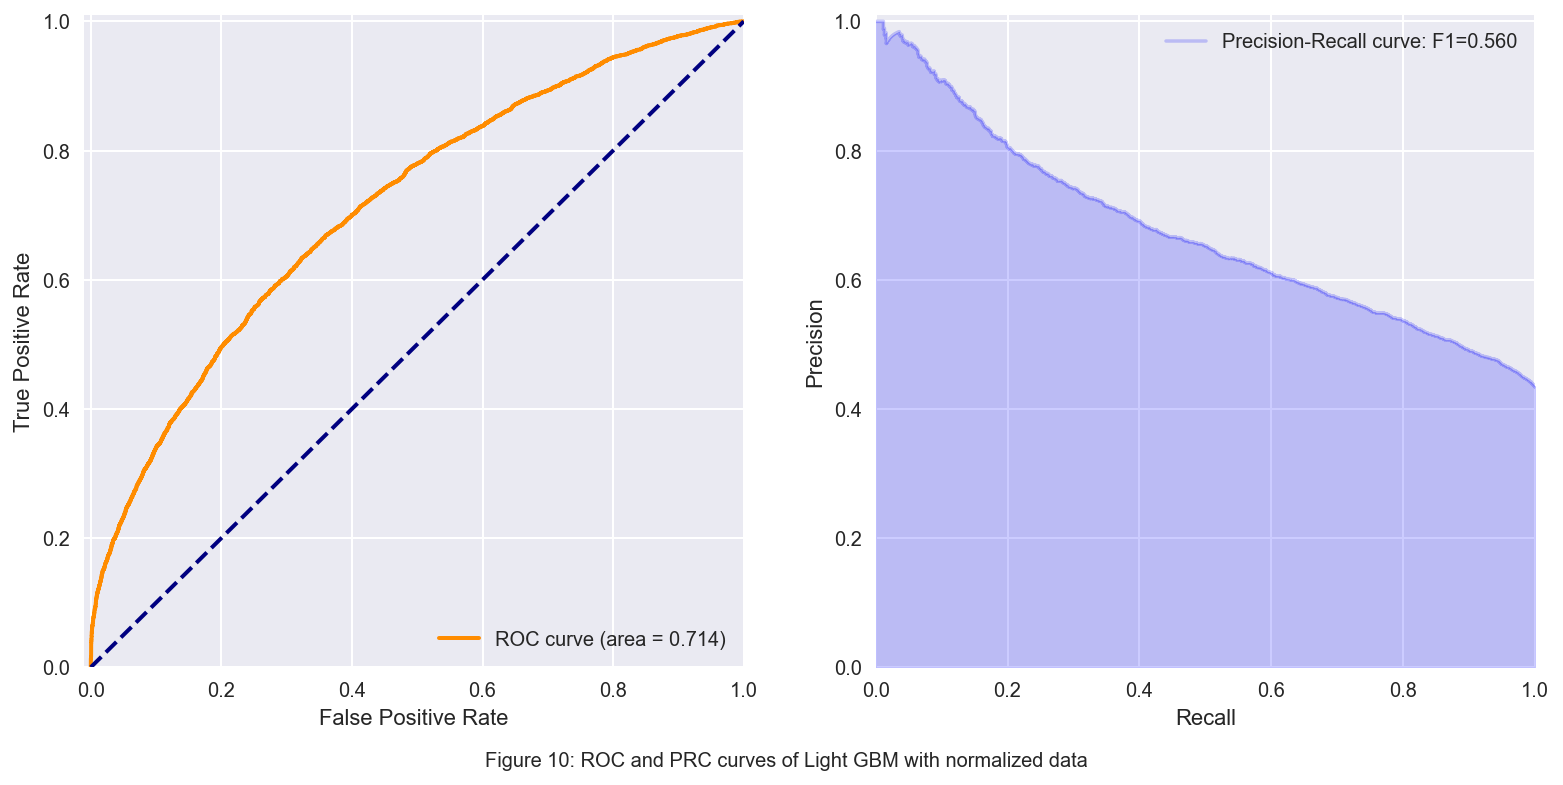

In [18]:
# Best parameters from tuning
LGBM_params = {'learning_rate': 0.08,
               'max_depth': 6,
               'min_child_samples': 2,
               'num_leaves': 16,
               'reg_alpha': 1,
               'reg_lambda': 0}
t = time.time()
LGBM = LGBMClassifier(**LGBM_params, random_state = 24, n_jobs = -1, importance_type = 'gain')
# Model is using Normalized data
pred_LGBM = LGBM.fit(X_train_Normalized, y_train).predict_proba(X_test_Normalized).T[1]
print('used time:', time.time()-t)
fig = plt.figure(figsize=(13, 6))
plot_curves(y_test, pred_LGBM)
fig.text(.5, .01, 'Figure 10: ROC and PRC curves of Light GBM with normalized data', ha='center')
plt.show()

### Model Comparison

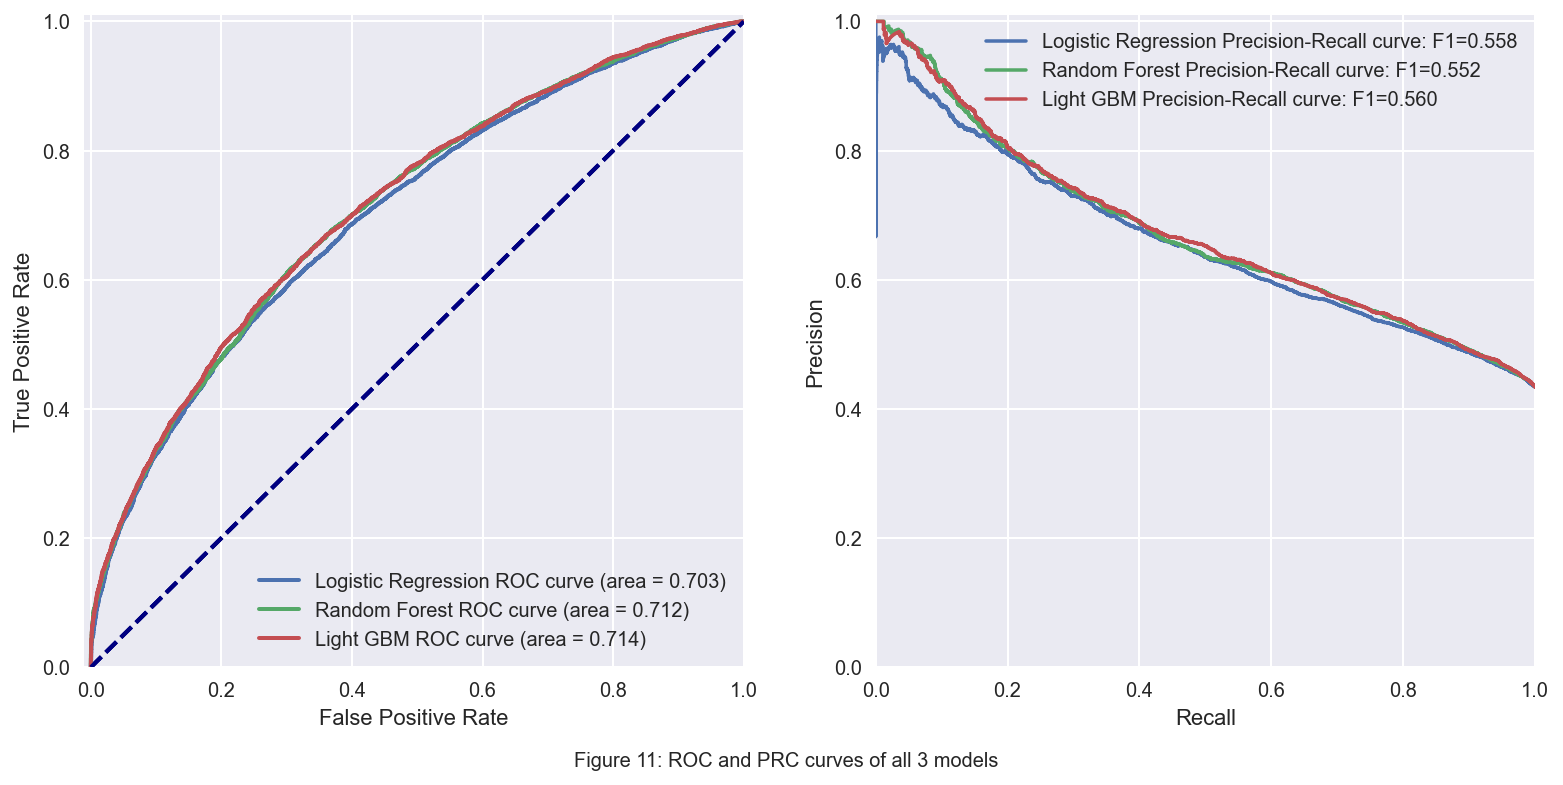

In [19]:
import warnings, matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
# Plotting three best models together
fig = plt.figure(figsize=(13, 6))
plot_curves(y_test, pred_LR3, C = False, lab = 'Logistic Regression ')
plot_curves(y_test, pred_RF, C = False, lab = 'Random Forest ')
plot_curves(y_test, pred_LGBM, C = False, lab = 'Light GBM ')
fig.text(.5, .01, 'Figure 11: ROC and PRC curves of all 3 models', ha='center')
plt.show()

### Feature Importance

In [20]:
# Process Logistic Regression coefficients by adding log coefficients back
c = np.absolute(LR.coef_[0])
c[0]+= c[10]
c[2]+= c[11]
c[4]+= c[12]
c[5]+= c[13]
c[6]+= c[14]
c[7]+= c[15]
c = c[:10]

# Computing RF Permutation importances
from rfpimp import importances
perm = importances(RF, X_train_Normalized, y_train).reset_index()

# Creating shap objects and Calculating shap values. Requires java installed
import shap
shap.initjs()
explainer = shap.TreeExplainer(LGBM)
shap_values = np.array(explainer.shap_values(X_train_Normalized))
shap_imp = (np.absolute(shap_values)[0]+np.absolute(shap_values)[1]).mean(axis = 0)

/Users/frank/.venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


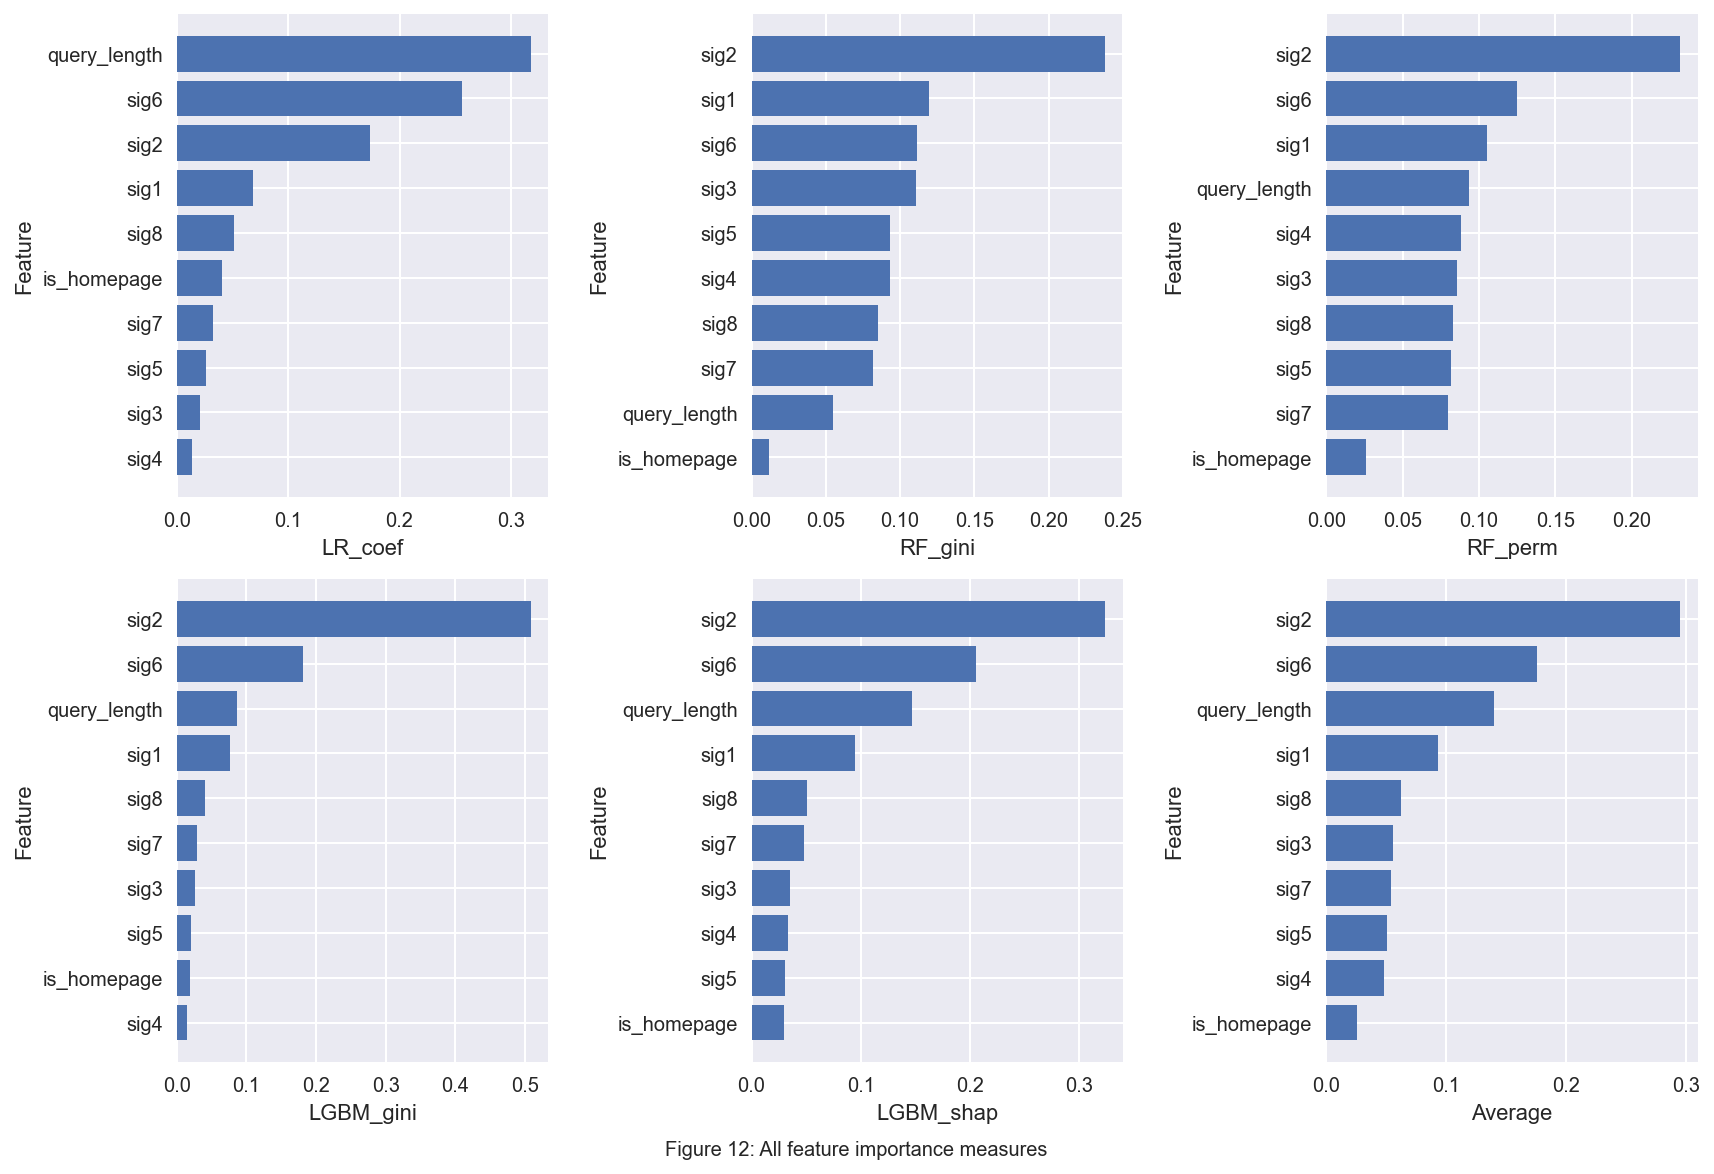

In [21]:
# Creating a DF containing all measures
IMP = pd.DataFrame({'Feature':X.columns,
                    'LR_coef':c,
                    'RF_gini':RF.feature_importances_,
                    'LGBM_gini':LGBM.feature_importances_,
                    'LGBM_shap':shap_imp})
IMP = IMP.merge(perm)
IMP = IMP.rename(columns={"Importance": "RF_perm"})
col = ['LR_coef', 'RF_gini', 'RF_perm', 'LGBM_gini', 'LGBM_shap']
# Standardize importances
for f in col:
    IMP[f]=IMP[f]/IMP[f].sum()
    
# Get an average
IMP['Average'] = IMP[col].mean(axis = 1)

# Plotting
fig = plt.figure(figsize=(12, 8))
for i, imp in enumerate(col+['Average']):
    t = IMP.sort_values(by = imp)
    plt.subplot(2, 3, i+1)
    plt.barh(y = t.Feature, width = t[imp])
    plt.xlabel(imp); plt.ylabel('Feature')
plt.tight_layout()
fig.text(.5, -.01, 'Figure 12: All feature importance measures', ha='center')
plt.show()

##### Model with only top 4 features

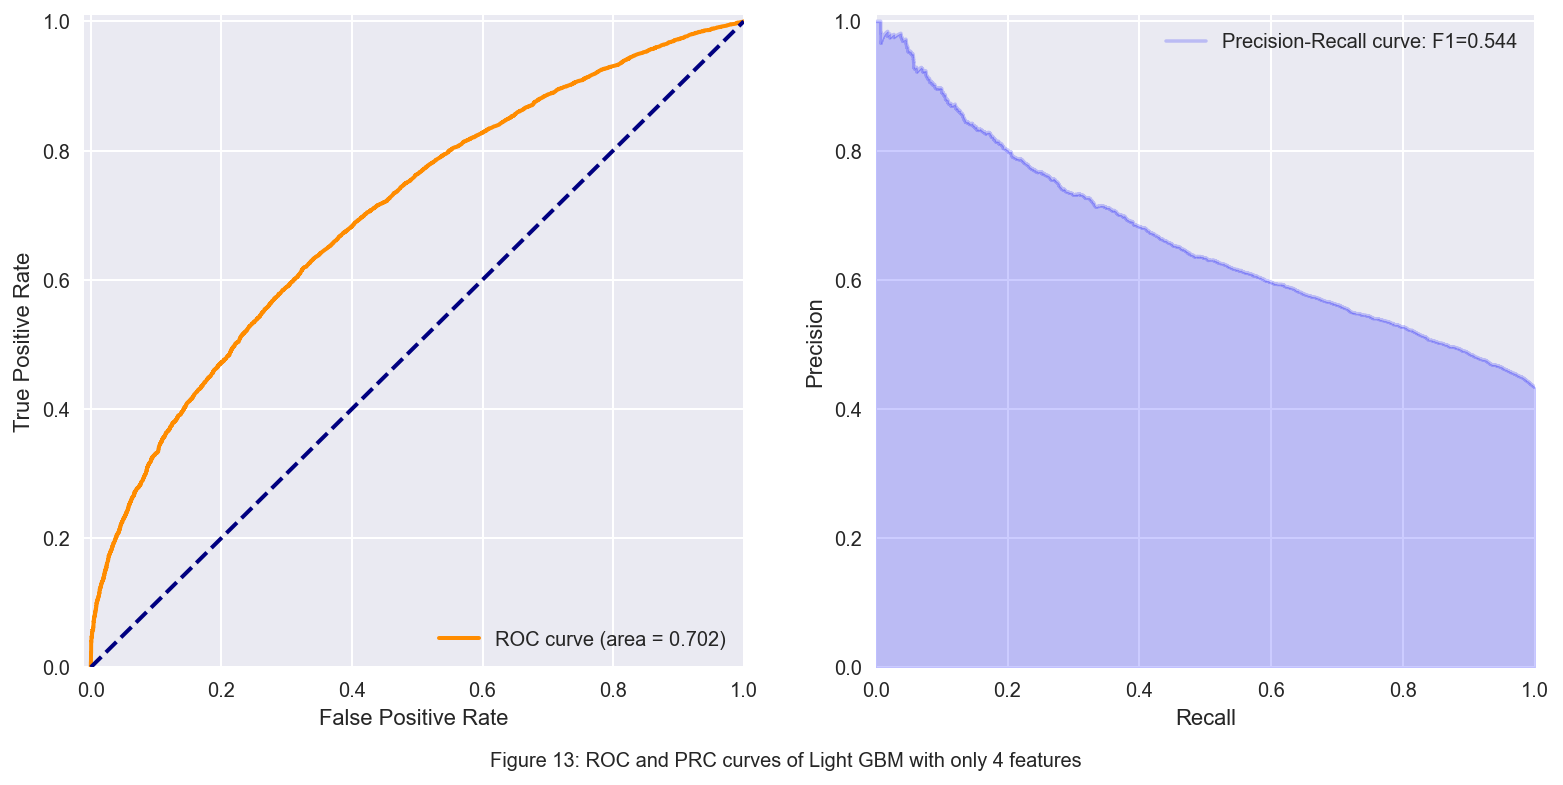

In [22]:
# Creating a data set with only sig2, sig6, query_length, sig1
temp_X_train = X_train_Normalized.iloc[:,[0,2,3,7]]
temp_X_test = X_test_Normalized.iloc[:,[0,2,3,7]]
# Using a 5-fold CV to see model's performance
LGBM2 = LGBMClassifier(**LGBM_params, random_state = 24, n_jobs = -1)
pred_LGBM2 = LGBM2.fit(temp_X_train, y_train).predict_proba(temp_X_test).T[1]
fig = plt.figure(figsize=(13, 6))
plot_curves(y_test, pred_LGBM2)
fig.text(.5, .01, 'Figure 13: ROC and PRC curves of Light GBM with only 4 features', ha='center')
plt.show()

### Feature Interpretation

In [23]:
X_train.iloc[3]

query_length     3.00
is_homepage      0.00
sig1             0.40
sig2             0.12
sig3            95.00
sig4            52.00
sig5            22.00
sig6             0.00
sig7             0.17
sig8             0.08
Name: 79549, dtype: float64

In [24]:
# Interpreting first row of data. Output here is log odds ratio.
row_num = 3
shap.force_plot(explainer.expected_value[1], shap_values[1][row_num], X_train.iloc[row_num])

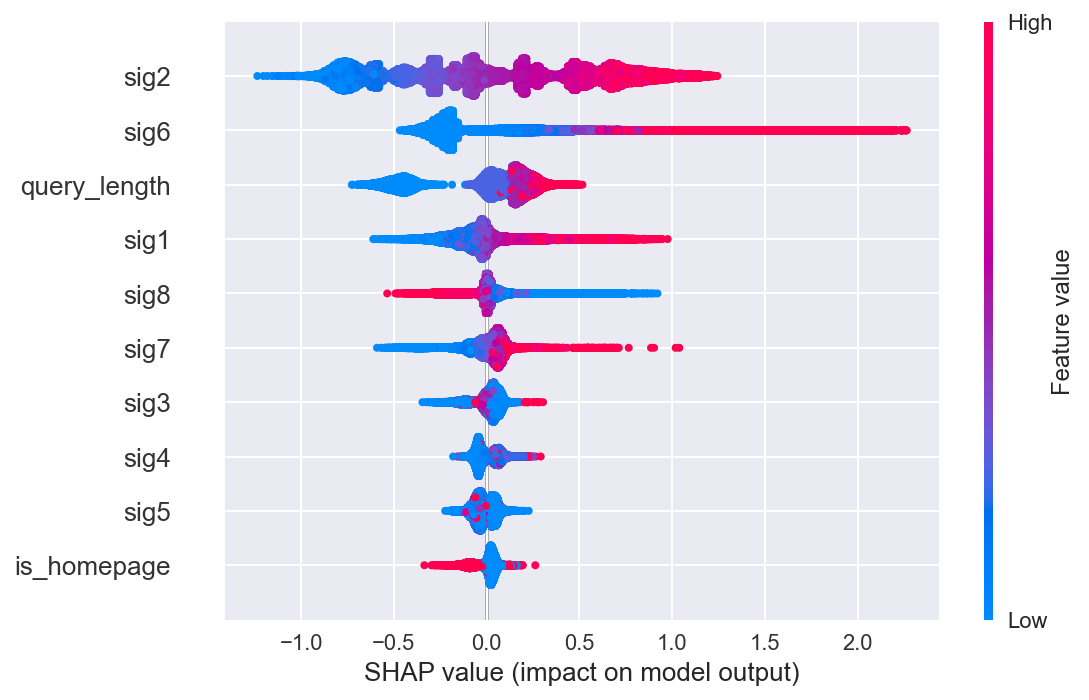

In [25]:
# General Feature Impacts on Prediction
shap.summary_plot(shap_values[1], X_train)

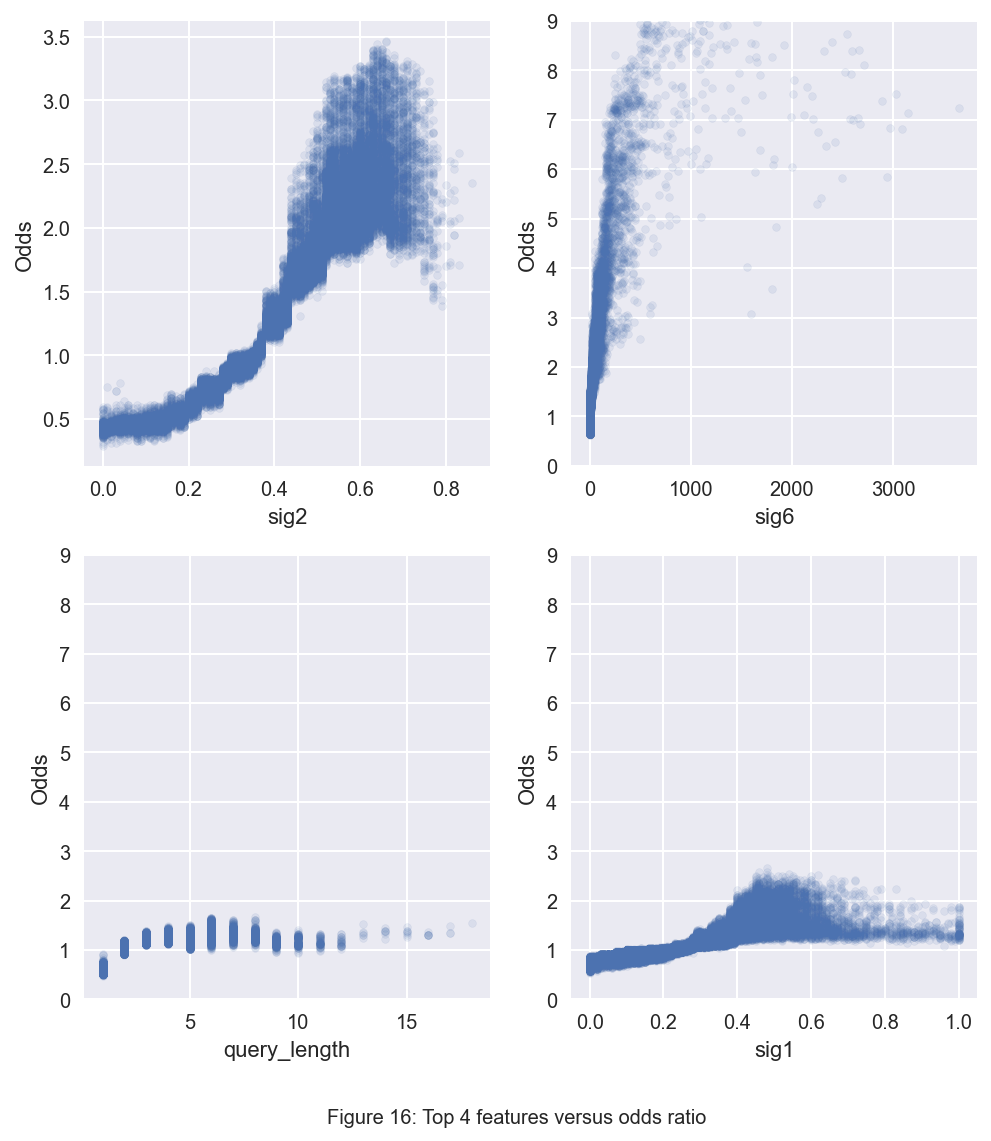

In [26]:
# Specific interpretation of sig2
t = pd.DataFrame({'sig2':X_train.sig2, 
                  'shap_values':shap_values[1].T[3]})
fig = plt.figure(figsize=(8, 9))
plt.subplot(221)
plt.scatter(t.sig2, np.exp(t.shap_values), alpha = 0.1, s = 15)
plt.xlabel('sig2'); plt.ylabel('Odds')

# Specific interpretation of sig6
t = pd.DataFrame({'sig6':X_train.sig6, 
                  'shap_values':shap_values[1].T[7]})
plt.subplot(222)
plt.scatter(t.sig6, np.exp(t.shap_values), alpha = 0.1, s = 15)
plt.xlabel('sig6'); plt.ylabel('Odds')
plt.ylim([0, 9])

# Specific interpretation of query length
t = pd.DataFrame({'querylength':X_train.query_length, 
                  'shap_values':shap_values[1].T[0]})
plt.subplot(223)
plt.scatter(t.querylength, np.exp(t.shap_values), alpha = 0.1, s = 15)
plt.xlabel('query_length'); plt.ylabel('Odds')
plt.ylim([0, 9])

# Specific interpretation of sig1
t = pd.DataFrame({'sig1':X_train.sig1, 
                  'shap_values':shap_values[1].T[2]})
plt.subplot(224)
plt.scatter(t.sig1, np.exp(t.shap_values), alpha = 0.1, s = 15)
plt.xlabel('sig1'); plt.ylabel('Odds')
plt.ylim([0, 9])

fig.text(.5, .03, 'Figure 16: Top 4 features versus odds ratio', ha='center')

plt.show()